# 📊 Análisis de Denuncias y Cámaras por Barrio
*Autor: Agustín Lago*

- Este notebook analiza la cantidad de denuncias y cámaras por barrio de Corrientes en 2024 .

- Lamentablemente el dataset de "Atencion al ciudadano 2024", tiene los registros desde enero a septiembre, asi que el analisis tal vez no es completo en un calendario.

- Los datasets utilizados provienen de la pagina https://datos.ciudaddecorrientes.gov.ar, datos correspondientes al gobierno de corrientes.




In [1]:
import pandas as pd
import numpy as np

In [2]:
Dcamaras= pd.read_csv("csv\Camaras-SAC - Cantidad de Camaras.csv")
Dbarrios = pd.read_csv("csv\Barrios - Barrios.csv")
Ddatos = pd.read_csv("csv\AtencionCiudadano2024.csv")

print(Dcamaras.head())
print(Dbarrios.head())
print(Ddatos.head())

   id_camara  id_barrio  id_calle  altura     tipo_camara  id_estado  \
0        100       27.0     7.664   887.0  Camara 1, fija          0   
1        101       27.0     7.664   894.0  camara 2, fija          0   
2        103       27.0     7.664   877.0  Camara 3, fija          0   
3        105       17.0     7.687   900.0            Domo          0   
4        106       17.0     7.709   889.0            Domo          0   

     latitud   longitud  
0 -27.467257 -58.839030  
1 -27.467318 -58.839168  
2 -27.467142 -58.839051  
3 -27.467847 -58.835521  
4 -27.467823 -58.833032  
   id_barrios         nombre_barrio            tipo_barrio numero_ordenanza  \
0         111  MERCEDITAS COLLANTES  ZONAS EN ORDENAMIENTO              S/D   
1         116            SAMELA SUR  ZONAS EN ORDENAMIENTO              S/D   
2         139       PARAJE PERICHON  BARRIOS POR ORDENANZA          6512/16   
3         121        SANTA RITA SUR  ZONAS EN ORDENAMIENTO              S/D   
4         122   

## Limpieza de valores Nulos y columnas innecesarias

In [3]:

Dcamaras.drop(['altura','id_estado'],axis=1,inplace=True)
Dcamaras = Dcamaras.dropna(subset=['id_barrio','id_calle'])
Dcamaras.drop(['longitud','latitud'],axis=1,inplace=True)

# Sacamos los "."" de los valores de id_calle e id_barrio
Dcamaras['id_calle'] = Dcamaras['id_calle'].astype(str)
Dcamaras['id_calle'] = Dcamaras['id_calle'].str.replace('.', '', regex=False)
Dcamaras['id_calle'] = Dcamaras['id_calle'].astype(int)
Dcamaras['id_barrio'] = Dcamaras['id_barrio'].astype(int)

print(Dcamaras.isnull().sum())
Dcamaras

id_camara      0
id_barrio      0
id_calle       0
tipo_camara    0
dtype: int64


,id_camara,id_barrio,id_calle,tipo_camara
0,100,27,7664,"Camara 1, fija"
1,101,27,7664,"camara 2, fija"
2,103,27,7664,"Camara 3, fija"
3,105,17,7687,Domo
4,106,17,7709,Domo
...,...,...,...,...
263,366,1,670,Parada segura - Camara 1 domo
264,367,1,670,Parada segura - Camara 2 fija
265,368,1,976,Parada segura - Camara 3 fija
266,369,1,976,Parada segura - Camara 4 fija


In [4]:
#Vamos a tomar de los datos solamente los pedidos que son Denuncias.
registros_denuncia= Ddatos[Ddatos['tipo_pedido']== 'Denuncia']
registros_denuncia.drop(['id_contacto','lng','lat','via_contacto'],axis=1,inplace=True)
# cambiamos el tipo de dato de momento_contacto a datetime
registros_denuncia['momento_contacto'] = pd.to_datetime(registros_denuncia['momento_contacto'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') 
registros_denuncia

C:\Users\54377\AppData\Local\Temp\ipykernel_10292\3455582653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_denuncia.drop(['id_contacto','lng','lat','via_contacto'],axis=1,inplace=True)
C:\Users\54377\AppData\Local\Temp\ipykernel_10292\3455582653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_denuncia['momento_contacto'] = pd.to_datetime(registros_denuncia['momento_contacto'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')


,momento_contacto,tipo_pedido,asunto,id_barrio,nombre_barrio
0,2024-01-01 04:02:27,Denuncia,Ruidos Molestos - Bares/Restaurante,99,VICTOR COLAS
2,2024-01-01 05:22:55,Denuncia,Residuos fuera de horario,9,ARAZATI
3,2024-01-01 07:33:05,Denuncia,Ruidos Molestos - Vecinos,99,VICTOR COLAS
5,2024-01-01 09:53:39,Denuncia,Ruidos Molestos - Vecinos,113,DR. MONTAÑA
6,2024-01-01 05:35:29,Denuncia,Residuos fuera de horario,9,ARAZATI
...,...,...,...,...,...
49384,2024-09-28 18:17:47,Denuncia,Ruidos Molestos - Vecinos,3,9 DE julio
49396,2024-09-28 01:14:37,Denuncia,Ruidos Molestos - Bares/Restaurante,16,CAMBA CUA
49402,2024-09-29 17:58:56,Denuncia,Ruidos Molestos - Bares/Restaurante,16,CAMBA CUA
49406,2024-09-18 18:21:57,Denuncia,Vendedor ambulante,86,SAN ROQUE


In [5]:

Dbarrios.drop(['numero_ordenanza','sup_ha','the_geom_barrios'],axis=1,inplace=True)
print(Dbarrios.isnull().sum())
Dbarrios

id_barrios       0
nombre_barrio    0
tipo_barrio      0
dtype: int64


,id_barrios,nombre_barrio,tipo_barrio
0,111,MERCEDITAS COLLANTES,ZONAS EN ORDENAMIENTO
1,116,SAMELA SUR,ZONAS EN ORDENAMIENTO
2,139,PARAJE PERICHON,BARRIOS POR ORDENANZA
3,121,SANTA RITA SUR,ZONAS EN ORDENAMIENTO
4,122,SANTA RITA NORTE,ZONAS EN ORDENAMIENTO
...,...,...,...
135,23,COLLANTES,BARRIOS POR ORDENANZA
136,140,ZONA SUR PIRAYUI,ZONAS EN ORDENAMIENTO
137,123,PIRAYUI NUEVO,ZONAS EN ORDENAMIENTO
138,126,ASENTAMIENTO PUNTA TAITALO,ASENTAMIENTOS INFORMALES


## Estructura de los datasets/dataframes.
Dcamaras -> Dataset sobre camaras.
- id_camara: identificador unico de camara.
- id_barrio: identificador unico de barrio.
- id_calle: identificador de calle (no se utiliza).
- tipo_camara: tipo de camara. (no se utiliza).

Registro_denuncias -> Dataframe de todos los pedidos de atencion al ciudadano, filtrado solamente por denuncias.
- tipo_pedido: Aclara las denuncias.
- asunto: Asunto por el cual fue la denuncia (no se utiliza ya que es muy variado y no tiene topicos estandarizados)
- id_barrio: Identificador unico de barrio.
- nombre_barrio: Nombre del barrio (Se utiliza este para la union luego, ya que el dataset de Atencion al ciudadano tiene mas registros de barrios que el dataset de barrios).

Dbarrios
- id_barrio: Identificador unico e barrio.
- nombre_barrio: Nombre acorde al barrio.
- tipo_barrio: Categoria que corresponde el barrio. (no se utiliza)

## Analisis

### Conteo de denuncias por barrio

In [6]:
#Pasamos la Serie a un DataFrame con dos columnas, id_barrio y cantidad_denuncias
denuncias_por_barrio = registros_denuncia["id_barrio"].value_counts().reset_index()
denuncias_por_barrio.columns = ['id_barrio', 'cantidad_denuncias']
print(denuncias_por_barrio.head())

   id_barrio  cantidad_denuncias
0         17                 346
1         16                 244
2         48                 228
3         51                 178
4         24                 150


### Cantidad de Camaras por barrio

In [7]:
camaras_por_barrio = Dcamaras['id_barrio'].value_counts().reset_index()
camaras_por_barrio.columns = ['id_barrio','cantidad_camaras']
camaras_por_barrio

,id_barrio,cantidad_camaras
0,4,23
1,17,21
2,9,18
3,27,18
4,48,14
5,15,13
6,29,12
7,55,12
8,16,9
9,95,9


In [8]:
#Uniremos los dataframes que creamos de denuncias por barrio y cantidad de camaras para unirlos en un dataframe de comparacion

comparacion = denuncias_por_barrio.merge(camaras_por_barrio,
                                        on='id_barrio',
                                        how='left')

#Orenamos las columnas
comparacion = comparacion[['id_barrio','cantidad_denuncias','cantidad_camaras']]
#Sacamos los valores NaN pasandolos a tener un valor 0 y la columna la cambiamos a un tipo entero
comparacion['cantidad_camaras']=comparacion['cantidad_camaras'].fillna(0).astype(int)

comparacion= comparacion.merge(registros_denuncia[['id_barrio','nombre_barrio']].drop_duplicates(subset=['id_barrio']), #el dataset de AtencionCiudadano2024 tiene mas barrios que el de barrios?)
                               on='id_barrio',
                               how='left')

comparacion

,id_barrio,cantidad_denuncias,cantidad_camaras,nombre_barrio
0,17,346,21,CENTRO
1,16,244,9,CAMBA CUA
2,48,228,14,LA ROSADA
3,51,178,7,LIBERTAD
4,24,150,0,CONCEPCION
...,...,...,...,...
125,131,1,0,CLUB DE CAMPO LAGUNA PUEBLO NUEVO
126,96,1,0,TAMBOR DE TACUARI
127,126,1,0,ASENTAMIENTO PUNTA TAITALO
128,20010,1,0,TRUJILLO-GALVAN II


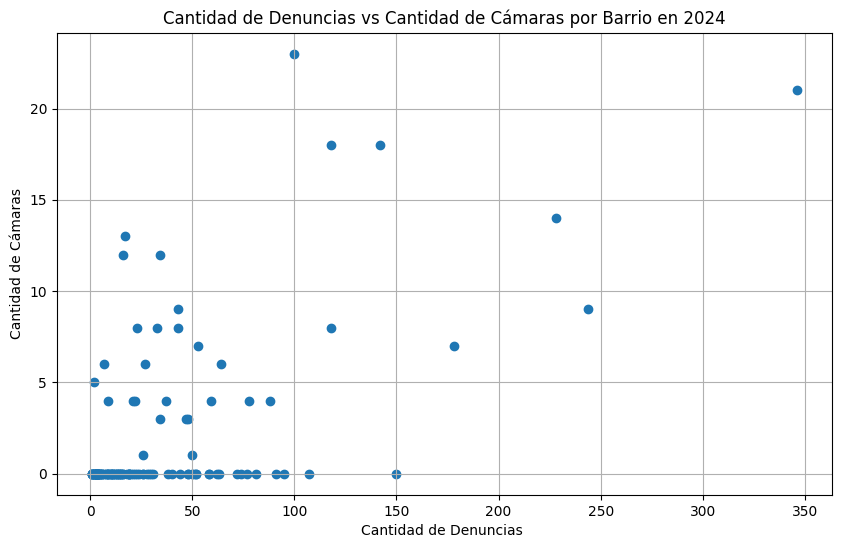

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(comparacion['cantidad_denuncias'], comparacion['cantidad_camaras'])
plt.title('Cantidad de Denuncias vs Cantidad de Cámaras por Barrio en 2024' )
plt.xlabel('Cantidad de Denuncias ')
plt.ylabel('Cantidad de Cámaras')
plt.grid(True)
plt.show()


In [10]:
#Estadistica desceriptiva
comparacion[['cantidad_denuncias','cantidad_camaras']].describe()

,cantidad_denuncias,cantidad_camaras
count,130.000000,130.000000
mean,35.115385,1.976923
std,50.286872,4.448613
min,1.000000,0.000000
25%,6.000000,0.000000
50%,16.500000,0.000000
75%,47.750000,0.000000
max,346.000000,23.000000


### ¿Qué nos dice esto?

Con respecto a la cantidad de denuncias podemos decir:

- En promedio cada barrio tiene aproximadamente 35 denuncias (mean) en 2024.
- Algunos barrios tienen muchas denuncias, mientras que otros tienen pocas o una (std).
- El 75% de los barrios tienen aproximadamente 47 denuncias en 2024.
- El barrio con más denuncias tiene 346 denuncias en 2024.

Con respecto a las cámaras:

- En promedio hay 2 cámaras por barrio.
- El valor 4.45 de desviación estándar nos indica, como en las denuncias, que hay mucha desviación, es decir, algunos barrios tienen muchas cámaras mientras que otros tienen pocas o ninguna.
- El valor mínimo es 0, lo cual indica que al menos 1 barrio no tiene cámaras.
- El valor del 3er percentil (75%) nos indica que justamente 3/4 de los barrios no tienen cámaras, indicando que no muchos barrios están equipados con cámaras.
- El barrio con más cámaras tiene 23 de ellas.

In [11]:
#Barrio con mas denuncias
barrio_mas_denuncias = comparacion[['id_barrio','nombre_barrio','cantidad_denuncias']].sort_values(by='cantidad_denuncias',ascending=False)
print(barrio_mas_denuncias.head(10))

   id_barrio nombre_barrio  cantidad_denuncias
0         17        CENTRO                 346
1         16     CAMBA CUA                 244
2         48     LA ROSADA                 228
3         51      LIBERTAD                 178
4         24    CONCEPCION                 150
5         27      DEPORTES                 142
6          1  17 DE agosto                 118
7          9       ARAZATI                 118
8         42         IRUPE                 107
9          4        ALDANA                 100


### Que un barrio no tenga camaras, ¿significa que es tranquilo?


In [12]:
#Barrios con pocos camaras pero muchas denuncias
comparacion['denuncias_por_camara'] = comparacion['cantidad_denuncias'] / comparacion['cantidad_camaras'].replace(0,1) # Evita division por 0

#ver barrios con alta cantidad de denuncias por camara
barrio_riesgo = comparacion[comparacion['denuncias_por_camara'] > 10] 

barrio_riesgo.sort_values(by='denuncias_por_camara',ascending=False).head(10)

,id_barrio,cantidad_denuncias,cantidad_camaras,nombre_barrio,denuncias_por_camara
4,24,150,0,CONCEPCION,150.0
8,42,107,0,IRUPE,107.0
10,79,95,0,SAN GERONIMO,95.0
11,3,91,0,9 DE julio,91.0
13,46,81,0,JUAN XXIII,81.0
15,66,77,0,PIRAYUI,77.0
16,101,74,0,VILLA CHIQUITA,74.0
17,77,72,0,SAN ANTONIO,72.0
19,33,63,0,FRAY J. DE LA QUINTANA,63.0
20,82,62,0,SAN JOSE,62.0


Esto responde a nuestra pregunta, que un barrio no tenga camaras no significa que sea tranquilo. 
- Como respuesta, deberian mejorar la seguridad con la inclusion de camaras o comisarias.

hora
0     384
1     357
2     202
3     235
4     132
5      66
6      69
7      49
8      95
9     130
10    171
11    200
12    180
13    252
14    291
15    211
16    169
17    146
18    171
19    190
20    156
21    172
22    228
23    309
Name: count, dtype: int64


C:\Users\54377\AppData\Local\Temp\ipykernel_10292\2351703074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_denuncia['hora']= pd.to_datetime(registros_denuncia['momento_contacto']).dt.hour


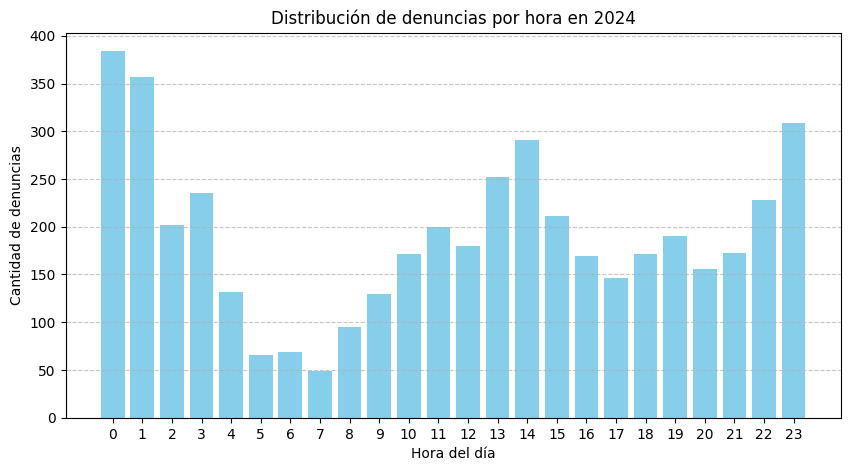

In [13]:
#Denuncias por hora
registros_denuncia['hora']= pd.to_datetime(registros_denuncia['momento_contacto']).dt.hour

# Forma para que no tire advertencia registros_denuncia.loc[:, 'hora'] = pd.to_datetime(registros_denuncia['momento_contacto']).dt.hour

denuncias_por_hora = registros_denuncia['hora'].value_counts().sort_index()

print(denuncias_por_hora)
plt.figure(figsize=(10, 5))
plt.bar(denuncias_por_hora.index, denuncias_por_hora.values, color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de denuncias')
plt.title('Distribución de denuncias por hora en 2024')
plt.xticks(range(24))  # Asegura las 24 hrs en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos observar graficamente las horas del dia en el cual se realizaron mas estas denuncias en 2024, donde tal vez con logica, las horas picos son entre las 0hrs y 1 hrs.


C:\Users\54377\AppData\Local\Temp\ipykernel_10292\66915133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_denuncia['mes'] = registros_denuncia['momento_contacto'].dt.month


mes
1    436
2    360
3    384
4    407
5    544
6    658
7    548
8    636
9    592
Name: count, dtype: int64


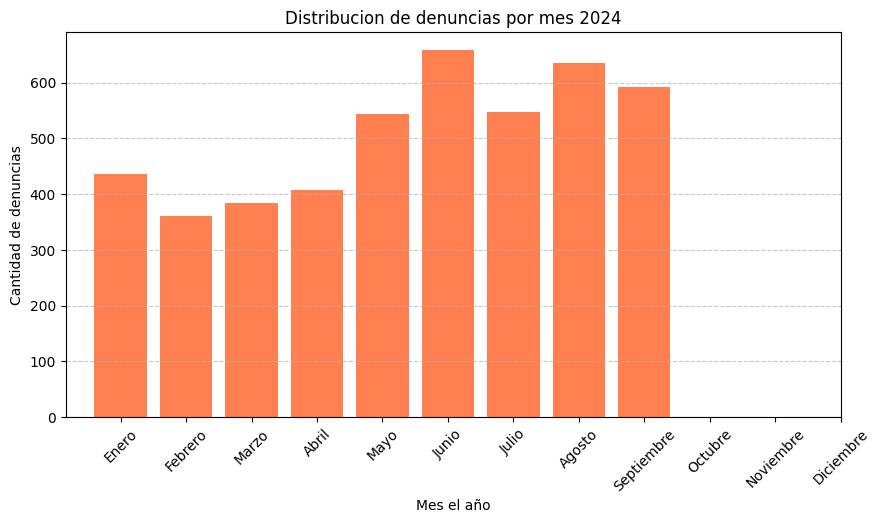

In [14]:
#registros_denuncia['mes'] = pd.to_datetime(registros_denuncia['momento_contacto'],errors='coerce')# Convierte los NaN en NaT
#registros_denuncia['mes'] = registros_denuncia['momento_contacto'].dt.month
# Convertir la columna a datetime

# Extraer el mes
registros_denuncia['mes'] = registros_denuncia['momento_contacto'].dt.month

denuncias_por_mes = registros_denuncia['mes'].value_counts().sort_index()

print(denuncias_por_mes)

plt.figure(figsize=(10,5))
plt.bar(denuncias_por_mes.index,denuncias_por_mes.values,color='coral')

plt.xlabel('Mes el año')
plt.ylabel('Cantidad de denuncias')
plt.title('Distribucion de denuncias por mes 2024')

plt.xticks(range(1,13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                          'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)

plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

Podemos observar, que el mes donde mas denuncias se realizaron fue en junio.
- Una teoria que puede responder a este dato, es el hecho de que en junio se entrega la primer parte del *aguinaldo*. Esto genera mas dinero en circulacion y por ende mayor consumo de actividades por parte de los ciudadanos correntinos.

## 📌 Conclusión  

El objetivo de este proyecto era identificar patrones en las denuncias y analizar qué barrios presentaban mayor cantidad de incidentes en relación con el nivel de seguridad (cantidad de cámaras de vigilancia).  

Sin embargo, el análisis tuvo algunas limitaciones:  
- El dataset de **Atención al Ciudadano** solo abarca los meses de **enero a septiembre**, lo que impide evaluar un ciclo anual completo.  
- **Noviembre y diciembre** suelen ser meses con mayor actividad social debido a las **fiestas y vacaciones**, lo que podría impactar en el número de denuncias.  

### 📊 **Hallazgos principales**
🔹 **Barrios con más denuncias y cámaras:**  
   - El barrio con más **denuncias** es **"CENTRO"**, con **346** en 2024.  
   - El barrio con más **cámaras** también es **"CENTRO"**, con **23** en 2024.  

🔹 **Índice de denuncias por cámara:**  
   - **"CONCEPCIÓN"** tiene la mayor cantidad de denuncias por cámara: **150 denuncias y 0 cámaras** en 2024.  

🔹 **Patrones temporales:**  
   - La hora con más denuncias es **00:00**, con **384 casos** en 2024.  
   - **Junio** es el mes con más denuncias (**658** en 2024).  
   - Entre **febrero y abril** se registraron los periodos más bajos de denuncias.  

### 🛠 **Recomendaciones y Aplicaciones**
✔️ **Mayor inversión en seguridad:**  
   - Se recomienda **aumentar la presencia de cámaras en barrios con altos índices de denuncias**, como **CONCEPCIÓN**.  
   - Fortalecer la vigilancia en **horarios críticos** (medianoche).  

✔️ **Análisis a largo plazo:**  
   - Ampliar el dataset con datos de **todo el año** permitiría analizar **patrones estacionales**.  
   - Analizar los datos de **2025** para determinar si hubo mejoras en la seguridad.   

Este análisis es un punto de partida para evaluar la seguridad en la ciudad y proponer medidas basadas en datos. 📈🔍  
